In [106]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [107]:
# read the new csv file
df = pd.read_csv('HR.csv')

In [108]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [110]:
# we can see that 'Work_accident', 'left' and 'promotion_last_5years' are integral 
# but in fact they are categorical
df['Work_accident'] = df.Work_accident.astype('category')
df['left'] = df.left.astype('category')
df['promotion_last_5years'] = df.promotion_last_5years.astype('category')

In [111]:
print (df.dtypes)

satisfaction_level        float64
last_evaluation           float64
number_project              int64
average_montly_hours        int64
time_spend_company          int64
Work_accident            category
left                     category
promotion_last_5years    category
department                 object
salary                     object
dtype: object


In [112]:
# basic statistics of variables
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


In [113]:
# basic statistics of variables
df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0,0,0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

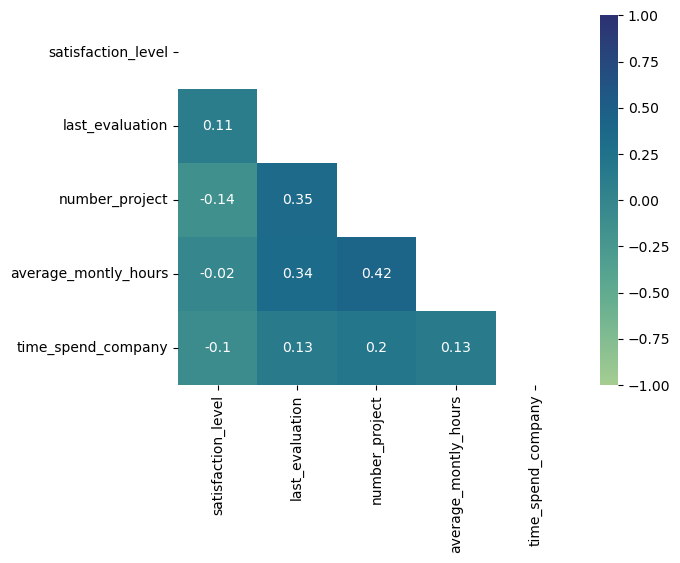

In [114]:
# correlation matrix
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, cmap="crest", vmax=1, vmin=-1, mask=mask)

In [115]:
# two most correlated and two least correlated variables
sorted_corr = corr.unstack().sort_values(ascending=False)
sorted_corr = sorted_corr[(sorted_corr != 1)]
print(f'most correlated: \n {sorted_corr.iloc[:1]} \n\nleast correlated: \n {sorted_corr.iloc[-1:]}')

most correlated: 
 number_project  average_montly_hours    0.417211
dtype: float64 

least correlated: 
 satisfaction_level  number_project   -0.14297
dtype: float64


In [116]:
# number of employees working in each department
df.groupby(['department']).size()

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
dtype: int64

In [117]:
# distribution of employees by salary
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [118]:
# distribution of employees by salaries in each department separately
df.groupby(['department'])['salary'].value_counts()

department   salary
IT           low        609
             medium     535
             high        83
RandD        medium     372
             low        364
             high        51
accounting   low        358
             medium     335
             high        74
hr           medium     359
             low        335
             high        45
management   high       225
             medium     225
             low        180
marketing    low        402
             medium     376
             high        80
product_mng  low        451
             medium     383
             high        68
sales        low       2099
             medium    1772
             high       269
support      low       1146
             medium     942
             high       141
technical    low       1372
             medium    1147
             high       201
Name: salary, dtype: int64

In [119]:
# do high-salaried employees spend more time at work than low-salaried employees?
high_salary_hours = df[df['salary'] == 'high']['average_montly_hours']
low_salary_hours = df[df['salary'] == 'low']['average_montly_hours']

t_statistic, p_value = stats.ttest_ind(high_salary_hours, low_salary_hours)

if p_value < 0.05:
    print("there is significant difference")
else:
    print("there is no significant difference")

there is no significant difference


In [120]:
# indicators among employees who left and who didnt (separately) :

In [121]:
# share of employees with a promotion in the last 5 years
result = df.groupby('left')['promotion_last_5years'].value_counts(normalize=True).rename("Percentage") * 100
result_count = df.groupby('left')['promotion_last_5years'].value_counts().rename("Count")
result = pd.concat([result_count, result], axis=1)
result

Count  Percentage
left                     
0    0  11128   97.374869
     1    300    2.625131
1    0   3552   99.467936
     1     19    0.532064

In [122]:
# average degree of satisfaction
df.groupby('left')['satisfaction_level'].mean()

left
0    0.666810
1    0.440098
Name: satisfaction_level, dtype: float64

In [123]:
# average number of projects
df.groupby('left')['number_project'].mean().round()

left
0    4.0
1    4.0
Name: number_project, dtype: float64

In [124]:
# LDA model

In [125]:
# first of all, we need to be sure that our data is normally distributed
# we can use visualization as well as the Shapiro-Wilk test

In [126]:
variables = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']

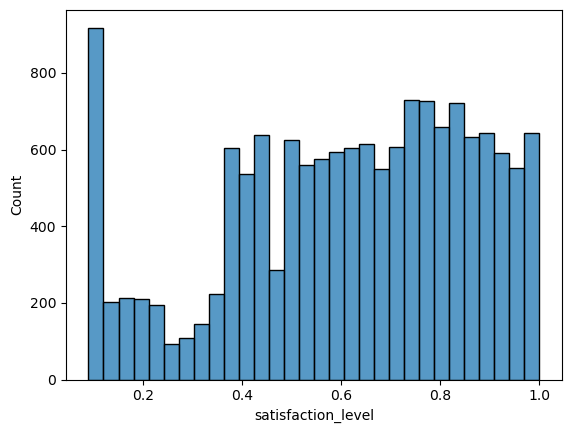

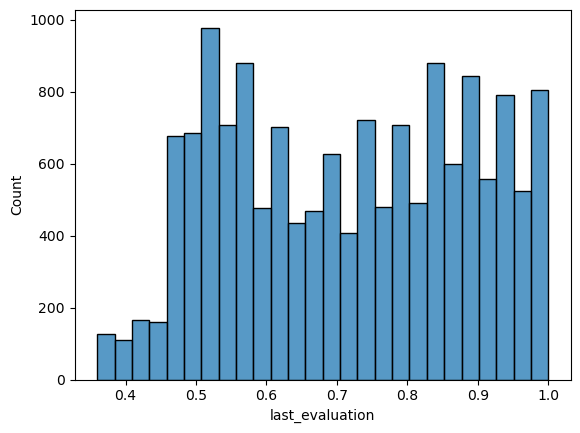

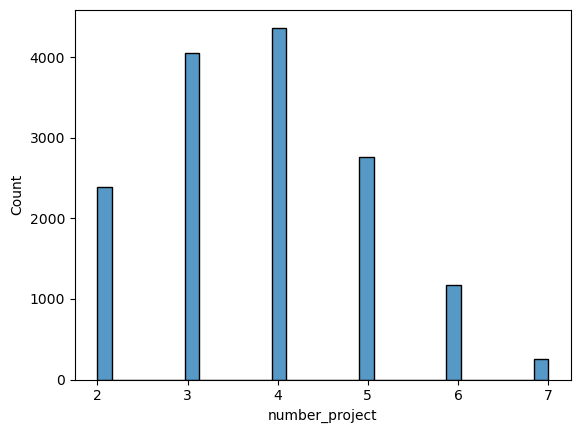

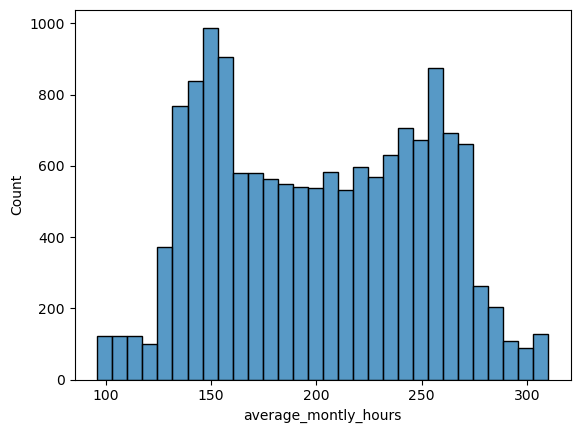

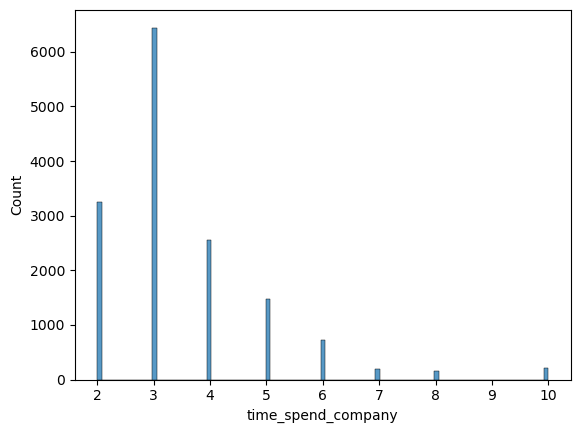

In [127]:
for variable in variables:
    sns.histplot(data=df, x=variable)
    plt.show()

In [128]:
for variable in variables:
    stat, p_value = shapiro(df[variable])
    print(f'Variable: {variable}')
    print(f'Shapiro-Wilk test statistic: {stat}')
    print(f'p-value: {p_value}')
    if p_value > 0.05:
        print('Distribution is approximately normal')
    else:
        print('Distribution is not normal')
    print('-------------------------')

Variable: satisfaction_level
Shapiro-Wilk test statistic: 0.9518879652023315
p-value: 0.0
Distribution is not normal
-------------------------
Variable: last_evaluation
Shapiro-Wilk test statistic: 0.9522111415863037
p-value: 0.0
Distribution is not normal
-------------------------
Variable: number_project
Shapiro-Wilk test statistic: 0.9216578006744385
p-value: 0.0
Distribution is not normal
-------------------------
Variable: average_montly_hours
Shapiro-Wilk test statistic: 0.9633577466011047
p-value: 0.0
Distribution is not normal
-------------------------
Variable: time_spend_company
Shapiro-Wilk test statistic: 0.7930466532707214
p-value: 0.0
Distribution is not normal
-------------------------


/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [129]:
# we can see that all variables are not normally distributed
# there are some ways to transform non-normally distributed variables to approximate normality 
# some common conversions include logarithm, square root, inverse, etc.

In [130]:
# but a task is a task so we keep going 

In [131]:
X = df[['satisfaction_level', 'last_evaluation','number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']]
y = df['left']

In [132]:
# splitting values into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [133]:
# creating lda model and fitting it on a train set
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [134]:
# getting predictions for the test sample
y_pred = lda.predict(X_test)

In [135]:
# evaluating the quality of the model using the accuracy metric
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7533333333333333


In [ ]:
# so as a result we can see that our model correctly classified 75.33% of the test sample data